# Random Forest

In [249]:
import pandas as pd

In [191]:
data = pd.read_csv('census-income.csv')

In [192]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [193]:
data[' income'] = data.iloc[:,-1]

In [194]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<=50K


In [195]:
# Data cleaning

In [196]:
data.drop(' ', inplace= True, axis = 1)

In [197]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [198]:
# Random Forest

In [199]:
#(a) Build a random forest model as follows:
#●	Divide the dataset into training and test sets in 80:20 ratio.
#●	Build a random forest model where the dependent variable is “y”(Income) and the rest 
# of the variables as independent variables and number of trees as 300.
#●	Predict values on the test set
#●	Build a confusion matrix and calculate the accuracy

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
# Feature engineering

In [202]:
data[' education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [203]:
data[' education'] = data[' education'].replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], ' school')
data[' education'] = data[' education'].replace(' HS-grad', ' high school')
data[' education'] = data[' education'].replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], ' higher')
data[' education'] = data[' education'].replace(' Bachelors', ' undergrad')
data[' education'] = data[' education'].replace(' Masters', ' grad')
data[' education'] = data[' education'].replace(' Doctorate', ' doc')

In [204]:
data.keys()

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [206]:
data[' income'].value_counts().keys()

Index([' <=50K', ' >50K'], dtype='object', name=' income')

In [207]:
# workclass

In [208]:
data[' workclass'] = data[' workclass'].replace(' ?', ' Private')

In [209]:
# marital-status

In [210]:
data[' marital-status'] = data[' marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], ' married')
data[' marital-status'] = data[' marital-status'].replace([' Never-married'], ' not-married')
data[' marital-status'] = data[' marital-status'].replace([' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent'], ' other')

In [211]:
# occupation

In [212]:
data[' occupation'] = data[' occupation'].replace(' ?', ' Prof-specialty')

In [213]:
# Native-country

In [214]:
data[' native-country'] = data[' native-country'].replace(' ?', ' United-States')

In [215]:
# income

In [216]:
data[' income'] = data[' income'].replace(' <=50K', 0)
data[' income'] = data[' income'].replace(' >50K', 1)

In [217]:
backup = data.copy()

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [219]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [220]:
le = LabelEncoder()

In [221]:
#Columns convert

In [222]:
x = x.apply(le.fit_transform)

In [223]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,2671,5,12,1,0,1,4,1,25,0,39,38
1,33,5,2926,5,12,0,3,0,4,1,0,0,12,38
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38
3,36,3,15336,4,6,0,5,0,2,1,0,0,39,38
4,11,3,19355,5,12,0,9,5,2,0,0,0,39,4


In [224]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name:  income, dtype: int64

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20, random_state = 1)
rf=RandomForestClassifier(n_estimators=300)

In [226]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [227]:
y_pred=rf.predict(x_test)

print('confusion_matrix :')
print(confusion_matrix(y_pred,y_test))

confusion_matrix :
[[4649  521]
 [ 377  966]]
accuracy_score : 0.8621219100261016


In [250]:
print('accuracy_score :',accuracy_score(y_test,y_pred))

accuracy_score : 0.8621219100261016


In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
cm = confusion_matrix(y_pred, y_test, labels = [0,1])

In [240]:
print(cm)

[[4649  521]
 [ 377  966]]


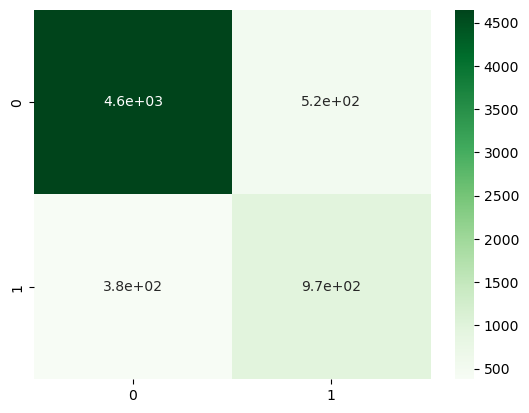

In [247]:
sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels=[0,1], yticklabels=[0,1])
plt.show()

In [251]:
data.shape

(32561, 15)